# Python Lists vs. Numpy Arrays - What is the difference?

https://webcourses.ucf.edu/courses/1249560/pages/python-lists-vs-numpy-arrays-what-is-the-difference

The Python core library provided **Lists**. 
* A list is the Python equivalent of an array, but is resizeable and can contain elements of different types.

A common beginner question is what is the real difference here. The answer is performance. **Numpy data structures** perform better in:

**Size** - Numpy data structures take up less space<br>
**Performance** - they have a need for speed and are faster than lists<br>
**Functionality** - SciPy and NumPy have optimized functions such as linear algebra operations built in.

# Memory

The main benefits of using NumPy arrays should be smaller memory consumption and better runtime behavior. 

For **Python Lists** 
- We can conclude from this that for every new element, we need another 8 bytes for the reference to the new object. 
- The new integer object itself consumes 28 bytes. 
- The size of a list "lst" without the size of the elements can be calculated with:
- 64 + 8 * len(lst) + len(lst) * 28

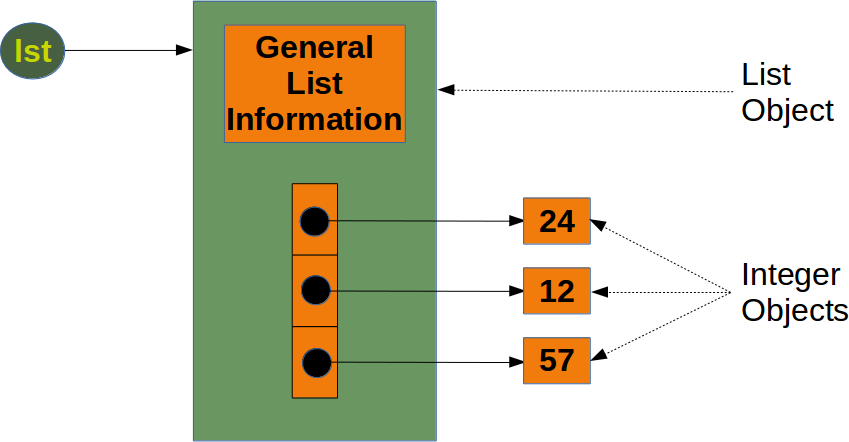

**NumPy** takes up less space. This means that an arbitrary integer array of length "n" in numpy needs
- 96 + n * 8 Bytes
- whereas a list of integer

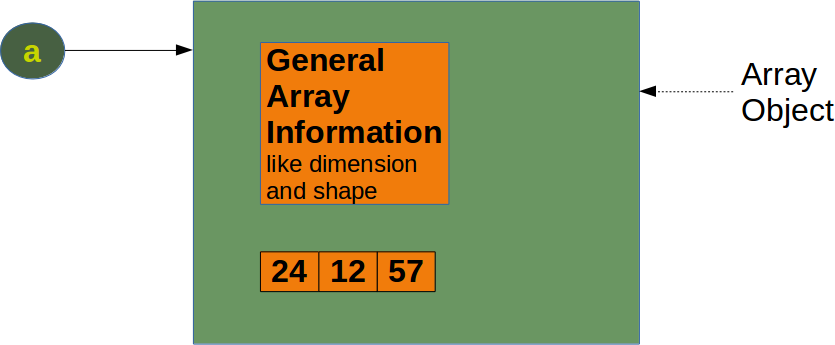

So the more numbers you need to store - the better you do.

In [ ]:
import time
import numpy as np

size_of_vec = 100000

def pure_python_version():
    t1 = time.time()
    X = range(size_of_vec)
    Y = range(size_of_vec)
    Z = [X[i] + Y[i] for i in range(len(X)) ]
    return time.time() - t1

def numpy_version():
    t1 = time.time()
    X = np.arange(size_of_vec)
    Y = np.arange(size_of_vec)
    Z = X + Y
    return time.time() - t1


t1 = pure_python_version()
t2 = numpy_version()
print(t1, t2)
print("Numpy is in this example " + str(t1/t2) + " faster!")

In [ ]:
import numpy as np
from timeit import Timer

size_of_vec = 100000
X_list = range(size_of_vec)
Y_list = range(size_of_vec)
X = np.arange(size_of_vec)
Y = np.arange(size_of_vec)

def pure_python_version():
    Z = [X_list[i] + Y_list[i] for i in range(len(X_list)) ]

def numpy_version():
    Z = X + Y

timer_obj1 = Timer("pure_python_version()", 
                   "from __main__ import pure_python_version")
timer_obj2 = Timer("numpy_version()", 
                   "from __main__ import numpy_version")

print(timer_obj1.timeit(10))
print(timer_obj2.timeit(10))  # Runs Faster!

print(timer_obj1.repeat(repeat=3, number=10))
print(timer_obj2.repeat(repeat=3, number=10)) # repeat to prove it!

# One Simple Trick for Speeding up your Python Code with Numpy

Over the past several years the popularity of Python has grown rapidly. A big part of that has been the rise of Data Science, Machine Learning, and AI, all of which have high-level Python libraries to work with!

When using Python for those types of work, it’s often necessary to work with very large datasets. Those large datasets get read directly into memor, and are stored and processed as Python arrays, lists, or dictionaries.

Working with such huge arrays can be time consuming; really that’s just the nature of the problem. You have thousands, millions, or even billions of data points. Every microsecond added to the processing of a single one of those points can drastically slow you down as a result of the large scale of the data you’re working with.

# The slow way

The slow way of processing large datasets is by using raw Python. We can demonstrate this with a very simple example.

The code below multiplies the value of 1.0000001 by itself, 5 million times!

In [ ]:
import time

start_time = time.time()

num_multiplies = 5000000
data = range(num_multiplies)
number = 1

for i in data:
    number *= 1.0000001

end_time = time.time()

print(number)
print("Run time = {}".format(end_time - start_time))

Let’s try another one with an array.

We’ll build a Numpy array of size 1000x1000 with a value of 1 at each and again try to multiple each element by a float 1.0000001. The code is shown below.

On the same machine, multiplying those array values by 1.0000001 in a regular floating point loop took 1.28507 seconds.

In [ ]:
import time
import numpy as np

start_time = time.time()

data = np.ones(shape=(1000, 1000), dtype=np.float)

for i in range(1000):
    for j in range(1000):
        data[i][j] *= 1.0000001
        data[i][j] *= 1.0000001
        data[i][j] *= 1.0000001
        data[i][j] *= 1.0000001
        data[i][j] *= 1.0000001

end_time = time.time()

print("Run time = {}".format(end_time - start_time))

# What is Vectorization?

Numpy is designed to be efficient with matrix operations. More specifically, most processing in Numpy is vectorized.

Vectorization involves expressing mathematical operations, such as the multiplication we’re using here, as occurring on entire arrays rather than their individual elements (as in our for-loop).

With vectorization, the underlying code is parallelized such that the operation can be run on multiply array elements at once, rather than looping through them one at a time. As long as the operation you are applying does not rely on any other array elements, i.e a “state”, then vectorization will give you some good speed ups.

Looping over Python arrays, lists, or dictionaries, can be slow. Thus, vectorized operations in Numpy are mapped to highly optimized C code, making them much faster than their standard Python counterparts.

# The fast way
Here’s the fast way to do things — by using Numpy the way it was designed to be used.

There’s a couple of points we can follow when looking to speed things up:
- If there’s a for-loop over an array, there’s a good chance we can replace it with some built-in Numpy function
- If we see any type of math, there’s a good chance we can replace it with some built-in Numpy function

Both of these points are really focused on replace non-vectorized Python code with optimised, vectorized, low-level C code.

Check out the fast version of our first example from before, this time with 1 billion multiplications.

We’ve done something very simple: we saw that we had a for-loop in which we were repeating the same mathematical operation many times. That should trigger immediately that we should go look for a Numpy function that can replace it.
    
We found one — the power function which simply applies a certain power to an input value. The dramatically sped of the code to run in 7.6293e-6 seconds — that’s ac

In [ ]:
import time
import numpy as np

start_time = time.time()

num_multiplies = 1000000000
data = range(num_multiplies)
number = 1

number *= np.power(1.0000001, num_multiplies)

end_time = time.time()

print(number)
print("Run time = {}".format(end_time - start_time))

It’s a very similar idea with multiplying values into Numpy arrays. We see that we’re using a double for-loop and should immediately recognised that there should be a faster way.

Conveniently, Numpy will automatically vectorise our code if we multiple our 1.0000001 scalar directly. So, we can write our multiplication in the same way as if we were multiplying by a Python list.

The code below demonstrates this and runs in 0.003618 seconds — that’s a 355X speedup!

In [ ]:
import time
import numpy as np

start_time = time.time()

data = np.ones(shape=(1000, 1000), dtype=np.float)

for i in range(5):
    data *= 1.0000001

end_time = time.time()

print("Run time = {}".format(end_time - start_time))